
# **Project 7: Naive Bayes Classifier**

### **Write your name here:** Tiffany Akwarandu



Imagine you are a Data Scientist at Google. More specifically at YouTube. Your first task is to create a model that given a YouTube comment you can classify to different sentiments like:

  - 'positive'
  - 'negative'
  - 'neutral'

Note that this is very important task because of reasons like:
1. Sentiment Analysis for Content Creators:

- Helps YouTubers understand audience sentiment towards their videos.
- Allows content creators to gauge viewer engagement beyond just likes and dislikes.
- Provides insights into audience reception, helping creators tailor future content.

2. Automated Comment Moderation:

- Identifies and flags toxic or offensive comments (negative sentiment).
- Reduces the manual effort required to moderate comments.


3. Brand and Product Analysis:

- Helps businesses and advertisers analyze customer feedback in YouTube video comments.
- Assists in evaluating public perception of products, services, or marketing campaigns.

4. Sentiment-Based Video Recommendations:

- Improves recommendation algorithms by incorporating comment sentiment as a factor.
- Enables platforms to promote videos with highly positive audience reception.

5. Market Research and Trend Analysis:
- Identifies emerging trends and audience preferences.
- Helps researchers study public opinions on various topics.

Since you have experience with Naïve Bayes, you decide to use this classification algorithm to analyze the text and classify it as either positive, negative, or neutral.

In addition to building our own Naive Bayes classifier, we are going to compare the performace of our classifier to the [Multinomial Naive Bayes Classifier](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) available in the scikit-learn library.

## Dataset

The dataset we will be using for this assignment will be the Youtube Comments Dataset from Kaggle:

https://www.kaggle.com/datasets/atifaliak/youtube-comments-dataset/data

It contains over 17,000 YouTube comments, each classified as either positive, negative, or neutral.

In [ ]:
# Import libraries
# These are the libraries you will use for this assignment. Do not import any other library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import calendar
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

## **Task 0: Import the Dataset**

Load the YouTube Comments Dataset and display the first few rows of the created DataFrame.

In [ ]:
#Write your code here
df = pd.read_csv('YoutubeCommentsDataSet.csv')
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


## **Task 1: Feature Engineering**

**1.1 Handling Missing Data**

Begin by cleaning the dataset. Remove any rows where the comments are null (i.e., missing values). After dropping these rows, verify that there are no null values left in the DataFrame.


In [ ]:
# Write your code here
df = df.dropna(subset=['Comment'])


# Verify no Null comments in our data
df.isnull().sum()


,0
Comment,0
Sentiment,0


**1.2 Visualizing Sentiment Distribution**

Use Seaborn's countplot function to visualize the distribution of the target variable, "Sentiment". This will help us understand how balanced or imbalanced the dataset is in terms of positive, negative, and neutral comments.

<Axes: xlabel='Sentiment', ylabel='count'>

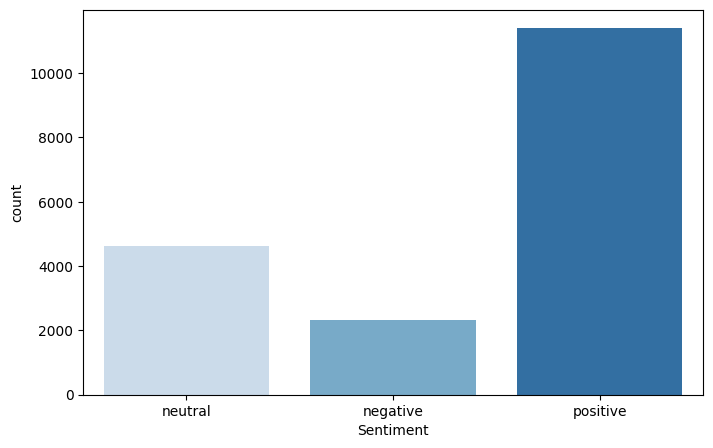

In [ ]:
# Write your code here
plt.figure(figsize=(8,5))
sns.countplot(x="Sentiment", data=df, hue="Sentiment", palette="Blues", legend=False)

**1.3 Analyzing Comment Lengths**

Calculate and display the average length of the comments in the dataset.

In [ ]:
# Write your code here
df['Comment_Length'] = df['Comment'].apply(len)
avg_length = df['Comment_Length'].mean()
print ( "Average comment length: ", avg_length)

Average comment length:  177.5541276410368


**1.4 Examining a Sample Comment**

Select one comment from the dataset—either randomly or one of your choice. Read the comment and check its assigned sentiment classification. Then, answer the following questions:

- Based on the comment's content, what sentiment do you think it should be classified as?
- Do you agree with the classification provided in the dataset? Why or why not?
- Do you think some comments in the dataset might have incorrect classifications? What could cause such misclassifications?

In [ ]:
# Write your code here


### **TODO: Write your answer to 1.4 here:**

Answer:
I think it should be classified as a positive sentiment. I agree with the sentiment that it was classified as positive.
It uses words like 'easy, convenient, secure', which are positive. I think if using the word 'no', the dataset might classify it as negative.



## **Task 2: Preparing Text Data for Naïve Bayes Classification**

Before applying the Naïve Bayes classifier, we need to convert our text data into numerical feature vectors. This process involves several key steps to ensure that our dataset is properly structured and ready for training.

**2.0 Examine DF shape**

- To understand the dataset's dimensions, first, display the shape of the DataFrame.

**2.1 Separate Features and Target Variables**

Define the independent and target variables:

- X (features): Contains the text data from the "Comment" column.
- y (labels): Contains the sentiment classification from the "Sentiment" column.

**2.2 Split the data**
- Use train_test_split from Scikit-Learn to perform this split. Set random_state=42 to ensure that the results remain consistent across different runs.


**2.3 Vectorize the text data using TfidfVectorizer**

TfidfVectorizer converts text to a matrix of TF-IDF features
- Import TfidfVectorizer from sklearn.feature_extraction.text

Some of the important hyperparameters are:
- max_features: Limits vocabulary to top N terms (recommended: 1000-5000)
- min_df: Ignores terms that appear in fewer than N documents
- stop_words: Removes common English words like 'the', 'and', etc.
- ngram_range: Controls whether to use single words or phrases (e.g., (1,2) for both)

For now just set max_features  = 1000

**2.4 Verify the Transformation**

Print the shapes of all resulting data structures:

- X_train_tfidf, X_test_tfidf, y_train, and y_test


This confirms the vectorization process worked as expected

In [ ]:
# Print the shape of DataFrame before vectorizing
print(df.shape)


(18364, 3)


In [ ]:
# Write your code here
X = df['Comment']
y = df['Sentiment']


In [ ]:
from sklearn.model_selection import train_test_split
# Write your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Write your code here
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Write your code here
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("X_test_tfidf shape:", X_test_tfidf.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_tfidf shape: (14691, 1000)
X_test_tfidf shape: (3673, 1000)
y_train shape: (14691,)
y_test shape: (3673,)


## **Task 3: Calculating the prior probabilities**

* Calculate the prior probabilities for each possible "Sentime" in `df` and populate a dictionary, `dict_priors`, where the key is the possible "Sentiment" values and the value is the prior probabilities. Show the dictionary. Do not hardcode the possible values of "Sentiment".  Don't forget about [value counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

In [ ]:
# Write your code here
target_col = 'Sentiment'
dict_priors = df[target_col].value_counts(normalize=True).to_dict()
print(dict_priors)


{'positive': 0.6208886952733609, 'neutral': 0.2518514484861686, 'negative': 0.12725985624047048}


## **Task 4: Create a model for the distribution of all of the numeric attributes**

* For each class, and for each attribute calculate the sample mean and sample standard deviation.  You should store the model in a nested dictionary, `dict_nb_model`, such that `dict_nb_model['positive']['feature']` is a tuple containing the mean and standard deviation for the target Type 'h' and the attribute 'Rooms'.  Show the model using the `display` function. You should ignore entries that are `NaN` in the mean and [standard deviation](https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html) calculation.

* The docstring included with this function is designed to offer detailed guidance and insight into its purpose and implementation. Given the complexity and intricacy involved in crafting this function, it's important to thoroughly comprehend the logic and steps described in the docstring. Carefully study and internalize the methodology outlined, as this understanding will be critical in effectively implementing the function. Take this opportunity to engage deeply with the material, and ensure that you grasp the function's objectives, the parameters it requires, and the output it generates. This hands-on experience is invaluable and will improve your ability to work with Naive Bayes models and similar machine learning techniques.

In [ ]:
def build_naive_bayes_model(X_train_tfidf, y_train, vectorizer):
    """
    Builds a Naive Bayes model dictionary for each target class in the dataframe.
    For each class, calculates the mean and standard deviation for every feature column,
    excluding the target column.

    Parameters:
    - X_train_tfidf: sparse matrix, TF-IDF transformed training data.
    - y_train: pandas Series, target sentiment labels.
    - vectorizer: TfidfVectorizer, used to extract feature names.

    Returns:
    - A dictionary where each key is a target class, and each value is another dictionary.
      This inner dictionary has feature column names as keys, and tuples of (mean, std deviation)
      as values for that feature with respect to the target class.
    """
    dict_nb_model = dict()
    # Get unique sentiment classes
    unique_targets = np.unique(y_train)

    # Convert TF-IDF sparse matrix to dense NumPy array
    X_train_dense = X_train_tfidf.toarray()

    # Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    for target in unique_targets:
        # Get the indices of samples belonging to this class
        class_indices = np.where(y_train == target)[0]


        # Extract the subset of the TF-IDF matrix for this class
        X_class = X_train_dense[class_indices]


        # Iterate over feature indices instead of DataFrame columns
        for i, word in enumerate(feature_names):
            # Calculate mean and standard deviation, excluding NaN values
            mean_value = np.nanmean(X_class[:, i])
            std_value = np.nanstd(X_class[:, i])


    return dict_nb_model

In [ ]:
dict_nb_model = build_naive_bayes_model(X_train_tfidf, y_train.values, vectorizer)


In [ ]:
# Display the model
from IPython.display import display
df_nb_model = pd.DataFrame(dict_nb_model)
display(df_nb_model)



""


## **Task 5: Write a function that calculates the probability of a Gaussian**

* Given the mean ($\mu$), standard deviation ($\sigma$), and a observed point, `x`, return the probability.  
* Use the formula $p(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$ ([wiki](https://en.wikipedia.org/wiki/Normal_distribution)).  You should use [numpy's exp](https://numpy.org/doc/stable/reference/generated/numpy.exp.html) function in your solution.
* Complete the docstring for the function you will implement.

In [ ]:
def get_probability(mu, sigma, x):
    """
    Calculate the probability density of x for a Gaussian distribution.

    This function computes the value of the probability density function (PDF)
    for a normal (Gaussian) distribution given the mean (mu), standard deviation
    (sigma), and a value x. The calculation is based on the formula for the PDF
    of a Gaussian distribution.

    Parameters:
    - mu (float): The mean of the Gaussian distribution.
    - sigma (float): The standard deviation of the Gaussian distribution. Sigma must be positive.
    - x (float): The point at which the PDF is evaluated.

    Returns:
    - float: The probability density of x in the Gaussian distribution defined by mu and sigma.

    Note:
    - The function assumes sigma > 0. Passing a non-positive sigma will result in a division by zero error.
    - This function does not check for the validity of the input types. Passing non-numeric types for mu, sigma, or x will result in a TypeError.
    """
    # Write your code here
    p = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    return p * np.exp(exponent)


## **Task 6: Write the Naive Bayes classifier function**

* The Naive Bayes classifier function, `nb_class`, below should take as a parameter the prior probability dictionary. `dict_priors`, the dictionary containing all of the gaussian distribution information for each attribue, `dict_nb_model`, and a single observation row (a series generated from iterrows) of the test dataframe.

* It should return a single target classification.

* For this problem, all of our attributes are numeric and modeled as Gaussians, so we don't worry about categorical data.

* Make sure to skip attributes that do not have a value in the observation.  Do not hardcode the possible classification types.



In [ ]:
import numpy as np

def nb_class(dict_priors, dict_nb_model, observation_tfidf):
    """
    Classifies a TF-IDF vector using the Naïve Bayes model.

    Parameters:
    - dict_priors (dict): Prior probabilities for each class.
    - dict_nb_model (dict): Gaussian distribution parameters (mean, std) for each TF-IDF feature.
    - observation_tfidf (numpy.ndarray): A single row from the TF-IDF matrix.

    Returns:
    - The class with the highest posterior probability.
    """
    dict_score = {}

    for target in dict_priors.keys():
        # Initialize score with log prior probability

        # Iterate over each TF-IDF feature
        for i in range(len(observation_tfidf)):


            if i in dict_nb_model[target]:
                mean, std = dict_nb_model[target][i]

                # Avoid zero probability issues
                if std == 0:
                  std = 1e-6

                # Compute Gaussian probability
                prob = get_probability(mean, std, observation_tfidf[i])

                # Use log probabilities to prevent underflow
                dict_score[target] += np.log(prob)


    # Return the class with the highest posterior probability
    return max(dict_score, key=dict_score.get)

## **Task 7: Calculate the accuracy using Naive Bayes classifier function on the test set**

Here, you will need to apply the same preprocessing and feature engineering techniques we applied to the training set.

* Apply the normalize_date function to the "Date" column to ensure all dates are in a consistent format as we did for the training set. This function should already be defined and implemented correctly in your notebook based on previous instructions.

* Convert the normalized date strings in the "Date" column to Unix time (seconds since the epoch) and store these in a new column named 'unixtime'.
After conversion, drop the original "Date" column as it's no longer needed.

* Iterate over each row in the df_test DataFrame, preparing each observation for classification by the Naive Bayes model.
* Drop the target column ('Type') from each observation and convert the row to a dictionary format using `.to_dict()`. This is necessary as the `nb_class` function expects the observation as a dictionary.
* Use the `nb_class` function to make predictions. This function should already be defined and requires dict_priors and dict_nb_model which should have been prepared earlier.
* Store each prediction in a list called predictions.

* Calculate the accuracy as the mean of the correct predictions by comparing the predictions list with the actual values in the 'Type' column of df_test.
* Print the accuracy as a percentage with two decimal places.

In [ ]:
predictions = []

# Convert sparse TF-IDF matrix to an array for iteration
X_test_array = X_test_tfidf.toarray()

# Loop through test dataset
for i in range(X_test_array.shape[0]):
    # Extract the TF-IDF vector for this sample
    observation_tfidf = X_test_array[i]

    # Predict sentiment using Naïve Bayes
    predicted_sentiment = nb_class(dict_priors, dict_nb_model, observation_tfidf, vectorizer)

    # Append prediction to list
    predictions.append(predicted_sentiment)

# Convert predictions list to a NumPy array
predictions = np.array(predictions)

# Calculate accuracy
accuracy = np.mean(predictions == y_test.values)

# Print final accuracy
print('Manual Accuracy is {:.2f}%'.format(accuracy * 100))


TypeError: nb_class() takes 3 positional arguments but 4 were given

### **Task 8: Use `scikit-learn` to do the same thing**

* Now we understand the inner workings of the Naive Bayes algorithm, let's compare our results to [scikit-learn's Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) implementation.

* Use the [GaussianNB](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes) to train using the `X_train_tfidf` and test using the `X_test_tfidf`.
* Then use the [MultinomialNB](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) to train using the `X_train_tfidf` and test using the `X_test_tfidf`.
* Call your train_test_nb function with the GaussianNB classifier and compare the results with your custom implementation.
* Call your train_test_nb function with the MultinomialNB classifier and evaluate which model performs better for text classification.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

def train_test_nb(X_train, X_test, y_train, y_test, model_nb):
    """
    Trains and tests a Naive Bayes model using scikit-learn on vectorized text data.
    Converts sparse TF-IDF matrices to dense arrays before applying the model.

    Parameters:
    - X_train: scipy.sparse matrix, TF-IDF vectorized training features
    - X_test: scipy.sparse matrix, TF-IDF vectorized testing features
    - y_train: array-like, target values for training data
    - y_test: array-like, target values for test data
    - model_nb: sklearn model, the Naive Bayes classifier to train

    Returns:
    - float: The accuracy of the model on the test set
    """

    # Convert sparse TF-IDF matrices to dense NumPy arrays
    X_train_dense = X_train.toarray()
    X_test_dense = X_test.toarray()

    # Training Naive Bayes model
    model_nb.fit(X_train_dense, y_train)


    # Testing the model
    y_pred = model_nb.predict(X_test_dense)


    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)


    # Printing the accuracy
    print('Sklearn GaussianNB Accuracy is {:.2f}%'.format(accuracy * 100))
    return accuracy

In [ ]:
# Write your code here
model = GaussianNB()
train_test_nb(X_train_tfidf, X_test_tfidf, y_train, y_test, model)


Sklearn GaussianNB Accuracy is 42.04%


0.4203648243942282

In [ ]:
# Write your code here
model = MultinomialNB()
train_test_nb(X_train_tfidf, X_test_tfidf, y_train, y_test, model)


Sklearn GaussianNB Accuracy is 67.03%


0.6702967601415737

## WRITE HERE
- Why was MultinomialNB better than GaussianNB?

Its specifically designed for disscrete data like word counts or TF-IDF values

## **Task 9: Create an Enhanced Text Vectorizer**

Now that we've successfully implemented basic TF-IDF vectorization, let's create an improved vectorizer with more sophisticated parameters:

- Create a new TfidfVectorizer instance with enhanced settings:

- Increase max_features to 5000 to capture a larger vocabulary
- Add stop_words='english' to remove common English words that don't contribute to sentiment
- Set ngram_range=(1, 2) to capture both individual words and meaningful word pairs

In [ ]:
# write your code here
vectorizer_2 = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)
X_train_tfidf_2 = vectorizer_2.fit_transform(X_train)
X_test_tfidf_2 = vectorizer_2.transform(X_test)

In [ ]:
# Write your code here
model = MultinomialNB()
